In [151]:
import pandas as pd
import numpy as np
import calculate as calc
import plot as plo

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from plot import get_cohort_careerage_df

In [152]:
CAREER_LENGTH = 1
#MIN_PUB = 10

#authorStartEndCareerData = pd.read_csv('./derived-data/authors-scientific-atleast-1-year.csv')
#authorStartEndCareerData = pd.read_csv('./derived-data/authors-scientific-atleast-10-year.csv')

authorStartEndCareerData = pd.read_csv('./derived-data/authors-scientific-extended.csv')

authorStartEndCareerData = authorStartEndCareerData[authorStartEndCareerData.career_length >= CAREER_LENGTH]
#authorStartEndCareerData = authorStartEndCareerData[authorStartEndCareerData.total_num_pub >= MIN_PUB]

authorStartEndCareerData.head(n=1)

,author,start_year,end_year,total_num_pub,career_length,gender,early_career_degree_1,early_career_degree_2,early_career_degree_3,early_career_degree_4,...,early_career_prod_5,max_absence-0-15,avg_absence-0-15,max_absence-0-3,avg_absence-0-3,max_absence-4-9,avg_absence-4-9,max_absence-10-15,avg_absence-10-15,dropped_after_10
9,a min tjoa,1979,2017,191,39,none,0.0,0.0,0.0,0.0,...,1,7,0.9375,3,1.5,3.0,2.5,1.0,0.357143,False


In [153]:
END_YEAR = 2018
MAX_CAREER_LENGTH_COHORT = 15

years = authorStartEndCareerData['start_year'].unique()
years = sorted(years)
cohort_start_years = [y for y in years if y < (END_YEAR - MAX_CAREER_LENGTH_COHORT)]

# smooth out the curve - group 2(or more) cohorts (start years) together
# 2 points on the plot get merged into one
num_years_in_cohort = 1

In [154]:
# smooth out the curve - group 2 cohorts (start years) together
# 2 points on the plot get merged into one

In [155]:
replace_dict = {}
cohort_start_years = list(range(cohort_start_years[0], cohort_start_years[-1], num_years_in_cohort))
for start_year in cohort_start_years:
    for i in range (1,num_years_in_cohort):
        replace_dict[start_year + i] = start_year
authorStartEndCareerData['start_year'] = authorStartEndCareerData['start_year'].replace(replace_dict)

In [156]:
import scipy.stats as stats

average_absence_cohort = authorStartEndCareerData.groupby('start_year')['avg_absence-0-15'].mean().loc[cohort_start_years]
average_max_absence_cohort = authorStartEndCareerData.groupby('start_year')['max_absence-0-15'].mean().loc[cohort_start_years]
std_max_absence_cohort = authorStartEndCareerData.groupby('start_year')['max_absence-0-15'].apply(lambda x: stats.sem(x)).loc[cohort_start_years]

authorStartEndCareerData_f = authorStartEndCareerData[authorStartEndCareerData["gender"]=="f"]
average_absence_cohort_f = authorStartEndCareerData_f.groupby('start_year')['avg_absence-0-15'].mean().loc[cohort_start_years]
average_max_absence_cohort_f = authorStartEndCareerData_f.groupby('start_year')['max_absence-0-15'].mean().loc[cohort_start_years]
std_max_absence_cohort_f = authorStartEndCareerData_f.groupby('start_year')['max_absence-0-15'].apply(lambda x: stats.sem(x)).loc[cohort_start_years]
std_average_absence_cohort_f = authorStartEndCareerData_f.groupby('start_year')['avg_absence-0-15'].apply(lambda x: stats.sem(x)).loc[cohort_start_years]


authorStartEndCareerData_m = authorStartEndCareerData[authorStartEndCareerData["gender"]=="m"]
average_absence_cohort_m = authorStartEndCareerData_m.groupby('start_year')['avg_absence-0-15'].mean().loc[cohort_start_years]
average_max_absence_cohort_m = authorStartEndCareerData_m.groupby('start_year')['max_absence-0-15'].mean().loc[cohort_start_years]
std_max_absence_cohort_m = authorStartEndCareerData_m.groupby('start_year')['max_absence-0-15'].apply(lambda x: stats.sem(x)).loc[cohort_start_years]
std_average_absence_cohort_m = authorStartEndCareerData_m.groupby('start_year')['avg_absence-0-15'].apply(lambda x: stats.sem(x)).loc[cohort_start_years]

authorStartEndCareerData_n = authorStartEndCareerData[authorStartEndCareerData["gender"]=="none"]
average_absence_cohort_n = authorStartEndCareerData_n.groupby('start_year')['avg_absence-0-15'].mean().loc[cohort_start_years]
average_max_absence_cohort_n = authorStartEndCareerData_n.groupby('start_year')['max_absence-0-15'].mean().loc[cohort_start_years]
std_max_absence_cohort_n = authorStartEndCareerData_n.groupby('start_year')['max_absence-0-15'].apply(lambda x: stats.sem(x)).loc[cohort_start_years]


/home/danielkostic/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/danielkostic/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Average waiting time analysis over cohorts

In [157]:
## We expect to see that average waiting times are decreasing over time since scientists recently form larger collaborations

/home/danielkostic/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/danielkostic/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


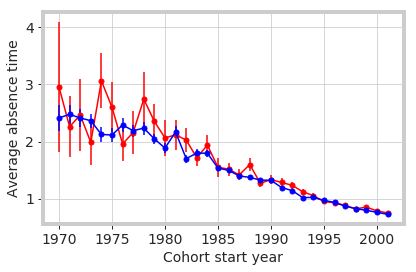

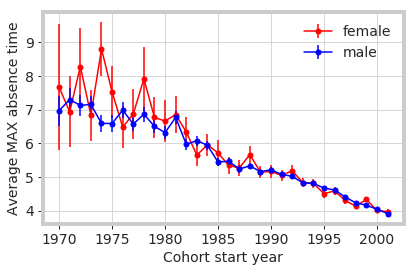

In [158]:
fig = plo.init_plotting().figure()
fig.patch.set_facecolor('white')
ax = fig.add_subplot(1,1,1) #, axisbg="white"
plt.rcParams['legend.loc'] = 'upper right'
#x = average_absence_cohort.index
#y = average_absence_cohort.values
x_f = average_absence_cohort_f.index
y_f = average_absence_cohort_f.values
x_m = average_absence_cohort_m.index
y_m = average_absence_cohort_m.values
#plt.plot(x,y)
ax.errorbar(x_f, y_f,  yerr=std_average_absence_cohort_f.values, marker='.', markersize=10, color="red", label="female")
ax.errorbar(x_m, y_m,  yerr=std_average_absence_cohort_m.values, marker='.', markersize=10, color="blue", label="male")
plt.xlabel('Cohort start year')
plt.ylabel("Average absence time")
fig.savefig(f'fig/avg_absence_grouped_{num_years_in_cohort}.png')
plt.show()

# print(std_max_absence_cohort)

fig = plo.init_plotting().figure()
fig.patch.set_facecolor('white')
ax = fig.add_subplot(1,1,1) #, axisbg="white"
plt.rcParams['legend.loc'] = 'upper right'
x = average_max_absence_cohort.index
y = average_max_absence_cohort.values
x_f = average_max_absence_cohort_f.index
y_f = average_max_absence_cohort_f.values
x_m = average_max_absence_cohort_m.index
y_m = average_max_absence_cohort_m.values
#x_n = average_max_absence_cohort_n.index
#y_n = average_max_absence_cohort_n.values

#plt.plot(x,y)
#ax.errorbar(x_n, y_n,  yerr=std_max_absence_cohort.values, marker='.', markersize=10, color="grey", label="none")
ax.errorbar(x_f, y_f,  yerr=std_max_absence_cohort_f.values, marker='.', markersize=10, color="red", label="female")
ax.errorbar(x_m, y_m,  yerr=std_max_absence_cohort_m.values, marker='.', markersize=10, color="blue", label="male")

plt.xlabel('Cohort start year')
plt.ylabel("Average MAX absence time")
plt.legend()
fig.savefig(f'fig/dropouts_grouped_{num_years_in_cohort}.png')
plt.show()

In [159]:
# unique_career_ages = np.unique(data["age"])
# max_years = np.max(unique_career_ages)
# cols = 5   
# nrows = int(math.ceil(float(max_years)/float(cols)))

In [160]:
# fig2, ax2 = plt.subplots(nrows=nrows, ncols=cols, sharex=True, sharey=True, figsize=(16,10))

In [161]:
# p = get_cohort_careerage_df(cohort_start_years, 15, 'avg_absence', authorStartEndCareerData)

## Dropouts

In [162]:
inactive = authorStartEndCareerData.groupby(['start_year', 'gender'])['dropped_after_10'].sum()

In [163]:
total = authorStartEndCareerData.groupby(['start_year', 'gender'])['dropped_after_10'].count()

In [164]:
inactive = inactive.to_frame()
inactive['all'] = total

In [165]:
inactive.head()

dropped_after_10  all
start_year gender                       
1970       f                    3.0    9
           m                   20.0   91
           none                27.0   71
1971       f                    5.0   17
           m                   37.0  139

In [166]:
inactive['percent_dropped'] = (inactive['dropped_after_10']*100)/inactive['all']

In [167]:
inactive = inactive.loc[cohort_start_years]

In [168]:
inactive.reset_index(inplace=True)

In [169]:
data_m = inactive[inactive['gender']=='m']
data_f = inactive[inactive['gender']=='f']
data_n = inactive[inactive['gender']=='none']

/home/danielkostic/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/danielkostic/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


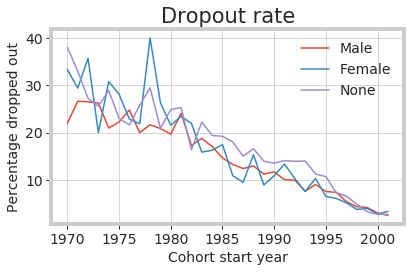

In [170]:
plt.plot(data_m['start_year'], data_m['percent_dropped'], label='Male')
plt.plot(data_f['start_year'], data_f['percent_dropped'], label='Female')
plt.plot(data_n['start_year'], data_n['percent_dropped'], label='None')
plt.title("Dropout rate")
plt.ylabel('Percentage dropped out')
plt.xlabel('Cohort start year')
plt.legend()
plt.show()

## Cliffs delta analysis

In [171]:
male = authorStartEndCareerData[authorStartEndCareerData.gender == 'm']["max_absence-0-15"]

In [172]:
female = authorStartEndCareerData[authorStartEndCareerData.gender == 'f']["max_absence-0-15"]

In [173]:
print(male.shape)
print(female.shape)

(97897,)
(20237,)


In [174]:
# over whole dataset
# do not run, compute heavy
# calc.cliffsD(male, female)
# -0.056557295548457606

In [180]:
calc.cliffsD([2,3,4], [1,2,3])

0.5555555555555555

/home/danielkostic/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/danielkostic/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


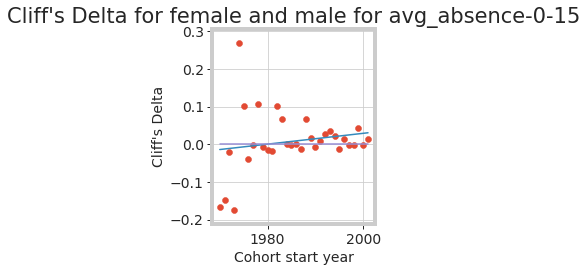

In [175]:
cd11 = calc.cliffs_delta_cohorts(authorStartEndCareerData, 'gender', 'f', 'm', 'avg_absence-0-15', cohort_start_years)
plo.plot_cliffs_delta(cd11, 'female', 'male', 'avg_absence-0-15')

/home/danielkostic/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/danielkostic/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


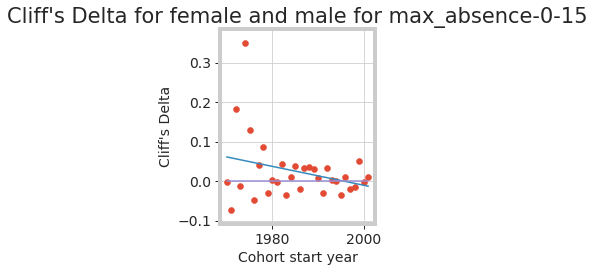

In [176]:
cd2 = calc.cliffs_delta_cohorts(authorStartEndCareerData, 'gender', 'f', 'm', 'max_absence-0-15', cohort_start_years)
plo.plot_cliffs_delta(cd2, 'female', 'male', 'max_absence-0-15')

/home/danielkostic/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/danielkostic/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


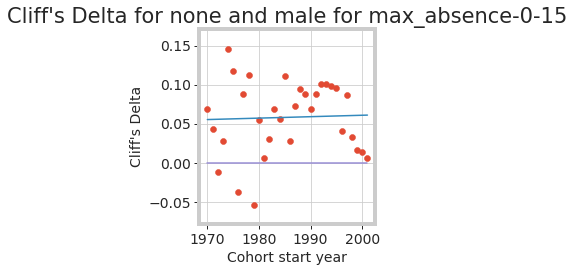

In [177]:
cd3 = calc.cliffs_delta_cohorts(authorStartEndCareerData, 'gender', 'none', 'm', 'max_absence-0-15', cohort_start_years)
plo.plot_cliffs_delta(cd3, 'none', 'male', 'max_absence-0-15')

/home/danielkostic/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/danielkostic/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


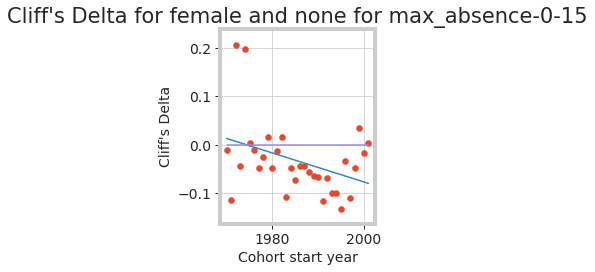

In [178]:
cd4 = calc.cliffs_delta_cohorts(authorStartEndCareerData, 'gender', 'f', 'none', 'max_absence-0-15', cohort_start_years)
plo.plot_cliffs_delta(cd4, 'female', 'none', 'max_absence-0-15')